# Lab 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1
Write a script to generate the samples of a sinusoid whose frequency and sampling rate are specified by the user. Also display this in two separate figures, (i) as a continuous sinusoid, (ii) and as the individual samples. (hint: Use the plot and stem commands).

In [ ]:
def sineWave(freq, rate):
  time = np.arange(0,2*np.pi,2*np.pi/rate)
  amplitude = np.sin(freq*time)

  plt.figure(figsize=(20,10))
  plt.subplot(211)
  plt.plot(time,amplitude)
  plt.subplot(212)
  plt.stem(time,amplitude,use_line_collection=True)

  plt.show()

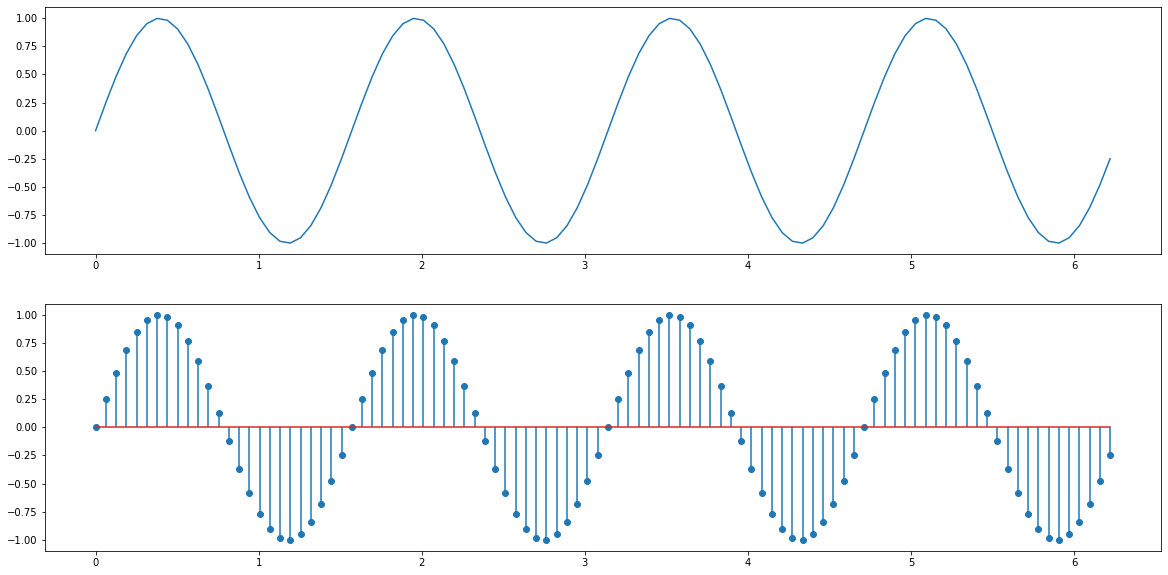

In [ ]:
sineWave(4,100)

## Question 2
Write a script to generate a random vector of length 10000 using the rand command, and plot its
histogram, and compare that against the uniform pdf in the range (0,1).

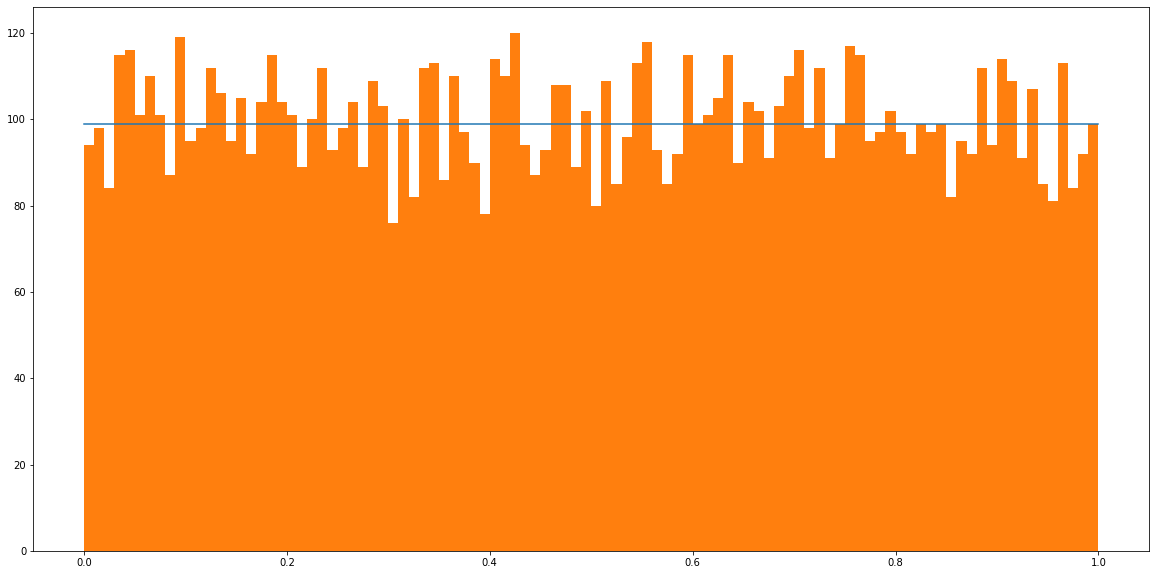

In [ ]:
interval = 0.01
x = np.random.rand(10000)
bins = np.arange(0,1 + interval,interval)

plt.figure(figsize=(20,10))
plt.plot((10000/len(bins))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

## Question 3
Repeat problem 2 using the randn and randi commands, and comment on the difference between
the outputs of the three random number generators.

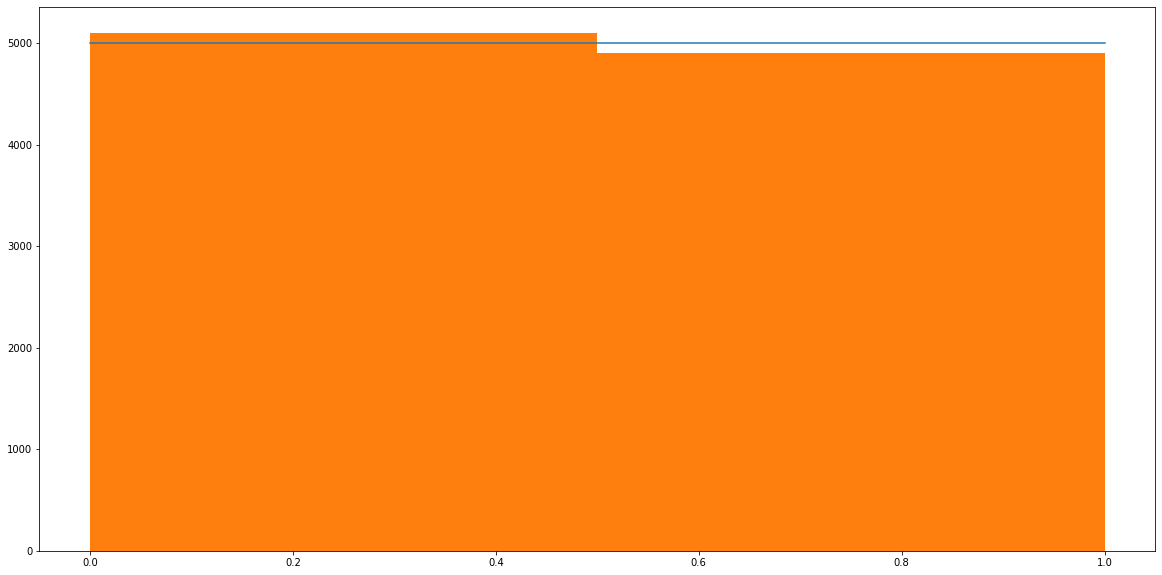

In [ ]:
x = np.random.randint(0,2,size=(10000))
bins = [0,0.5,1]

plt.figure(figsize=(20,10))
plt.plot((10000/(len(bins)-1))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

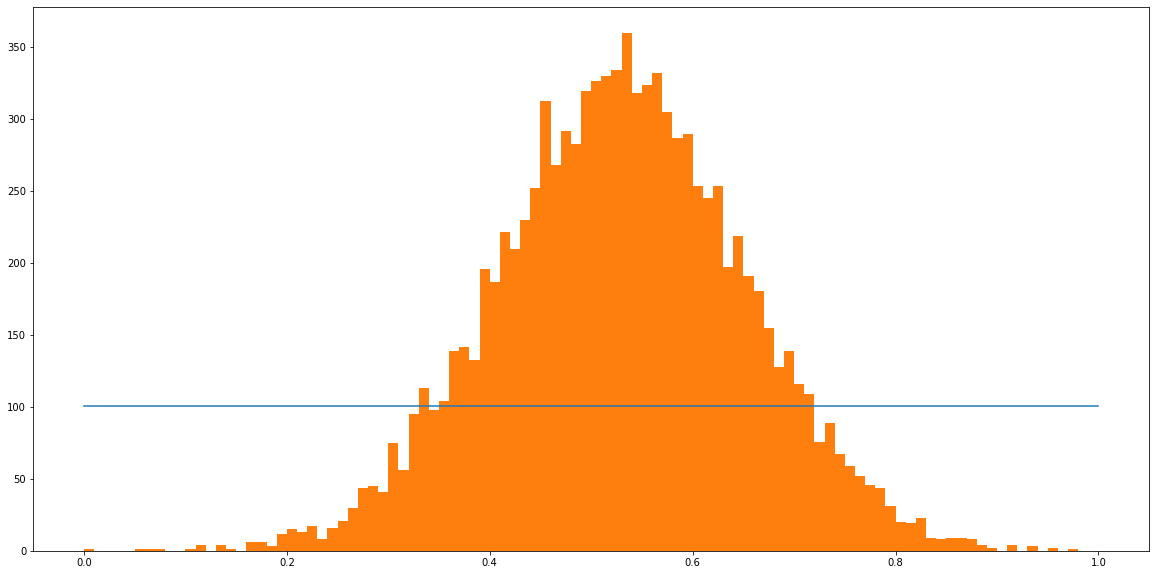

In [ ]:
x = np.random.randn(10000)
x = (x + abs(x.min()))/(x.max()-x.min())
bins = np.arange(0,1,0.01)

plt.figure(figsize=(20,10))
plt.plot((10000/(len(bins)-1))*np.ones(2))
plt.hist(x,bins=bins)
plt.show()

## Question 4
Write a function ‘averg’ to numerically evaluate the average of an input vector. You may only use
the for loop and the length command.

In [ ]:
def averg(x):
  sum = 0
  for i in x:
    sum+=i
  return (sum/len(x))

x = np.random.rand(10000)
averg(x)

0.49745479575528634

## Question 5
Write a script to use the function ‘averg’ defined in problem 6 to evaluate empirical variance of
an input random vector.

In [ ]:
x = np.random.rand(10000)
mean_x = averg(x)
var = ( (x-mean_x)**2 /(len(x))).sum()
print(var)

0.08278927625413038


## Question 6
Write a function gateduty(N,d) to generate a rectangular pulse of length N with a duty cycle of
d%.

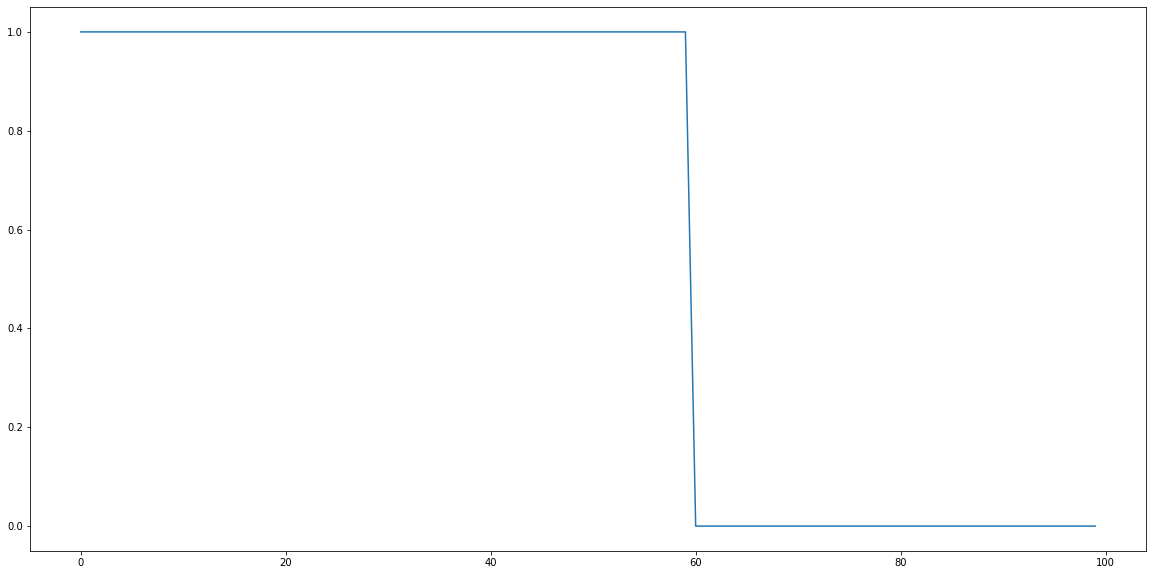

In [ ]:
def gateduty(n,d):
  high = np.ones(int(n*d/100))
  pulse = np.append(high, np.zeros(int(n-(n*d/100))))
  return pulse

plt.figure(figsize=(20,10))
plt.plot(gateduty(100,60))
plt.show()

## Question 7
Write a script to generate M periods of gateduty(N,d), and use the following commands to obtain
the power spectral density of the generated signal.
a. fft b.psd c. pwelch

Comment on the so obtained in your lab record for different values of M;N and D, and different
due to the use of different commands. What is the difference between these commands?

In [ ]:
import scipy.signal as sig

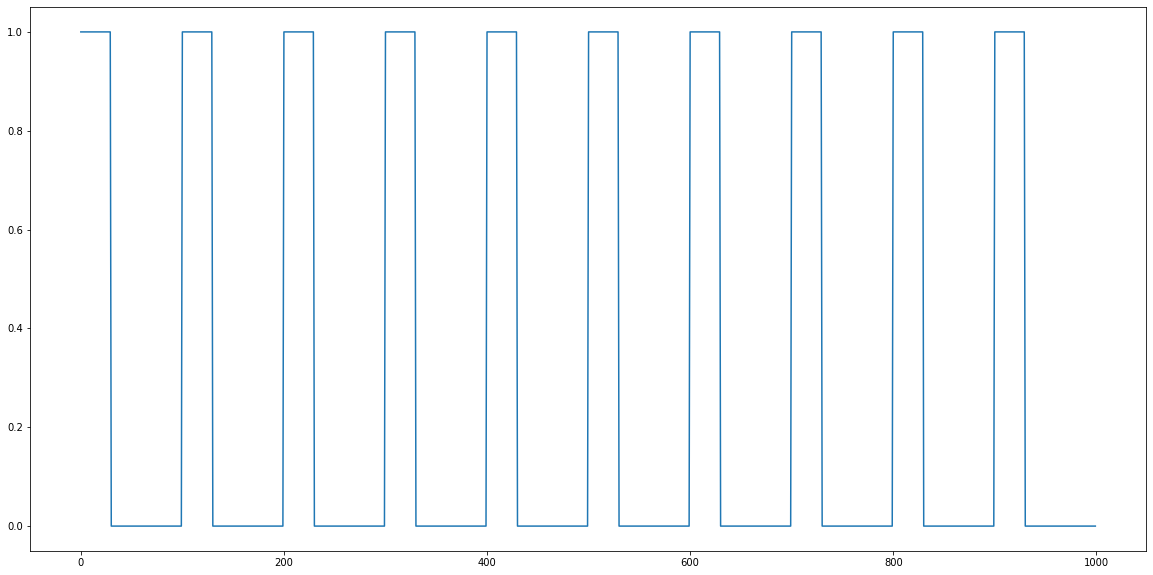

In [ ]:
M = 10
x = gateduty(100,30)
y=[]
for i in range(M):
  y = np.append(y,x)

plt.figure(figsize=(20,10))
plt.plot(y)
plt.show()

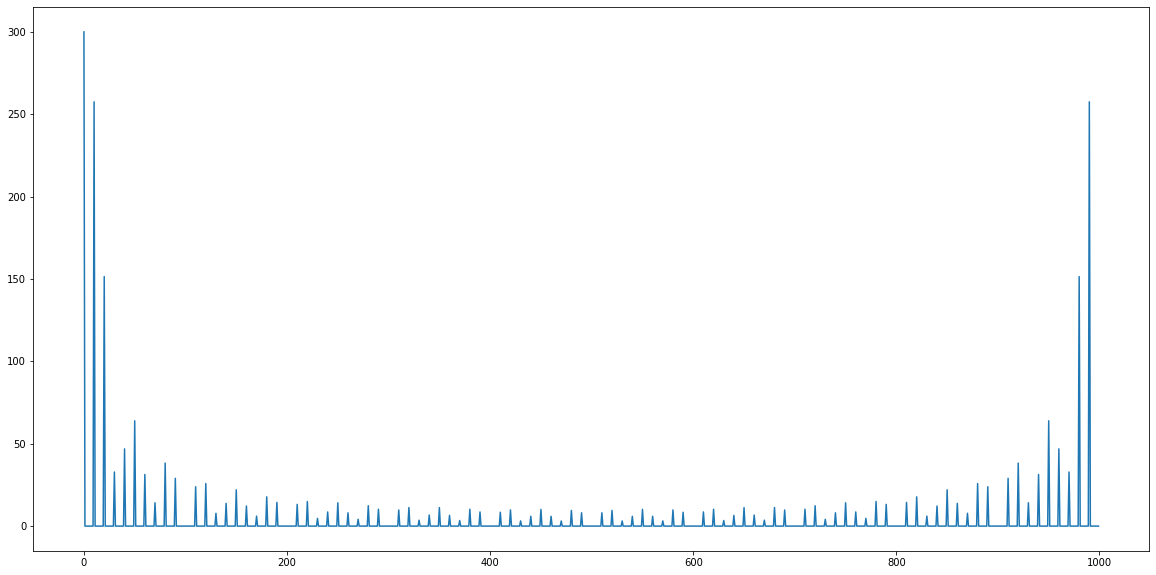

In [ ]:
y_fft = abs(np.fft.fft(y))

plt.figure(figsize=(20,10))
plt.plot(y_fft)
plt.show()

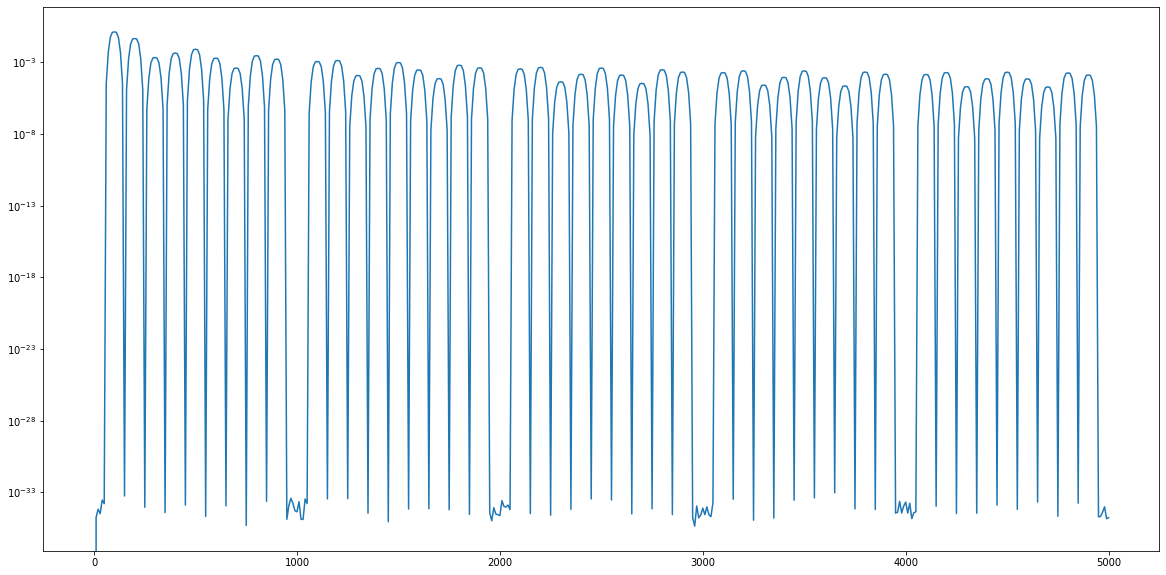

In [ ]:
f, Pper_spec = sig.periodogram(y,10e3,'flattop',scaling='spectrum')

plt.figure(figsize=(20,10))
plt.semilogy(f, Pper_spec)
plt.show()

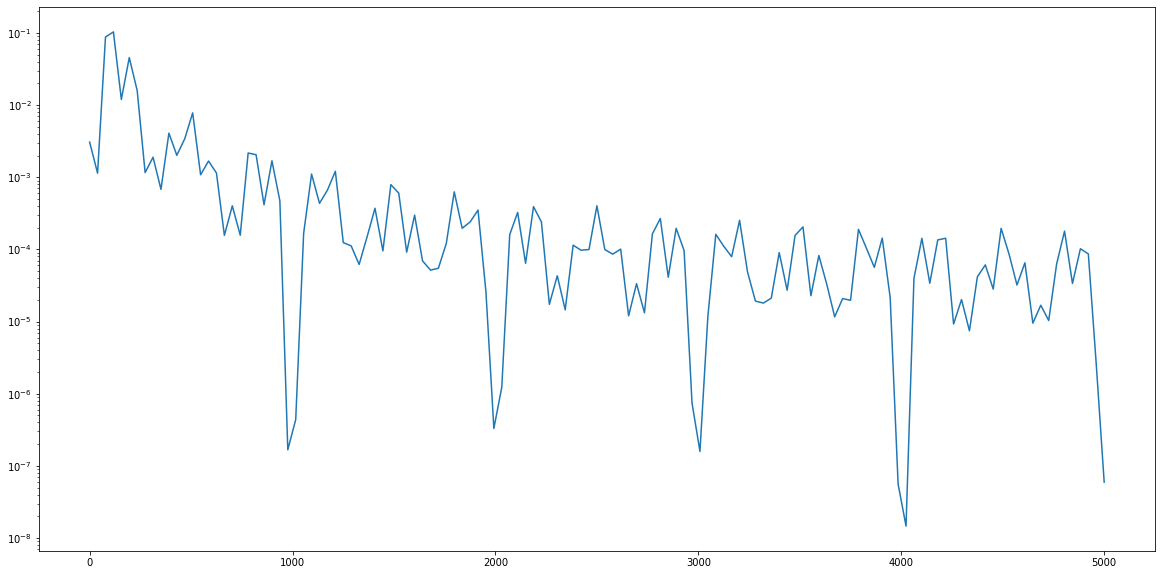

In [ ]:
f, Pper_spec = sig.welch(y,10e3,scaling='spectrum')

plt.figure(figsize=(20,10))
plt.semilogy(f, Pper_spec)
plt.show()

## Question 8
 Write a function sampmean(N), with an integer input N, for calculating the sample mean of N
zero mean Gaussian random variables having unit variance.

In [ ]:
def sampmean(N):
    sample_sum = 0
    for i in range(N):
        sample_sum += np.random.randn()
        
    return sample_sum/N

print(f"{sampmean(10000):.5f}")

0.00877


## Question 9

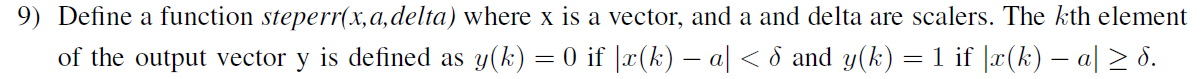

In [ ]:
def steperr(x, a, delta):
    y = np.abs(x-a) >= delta
    return y*1

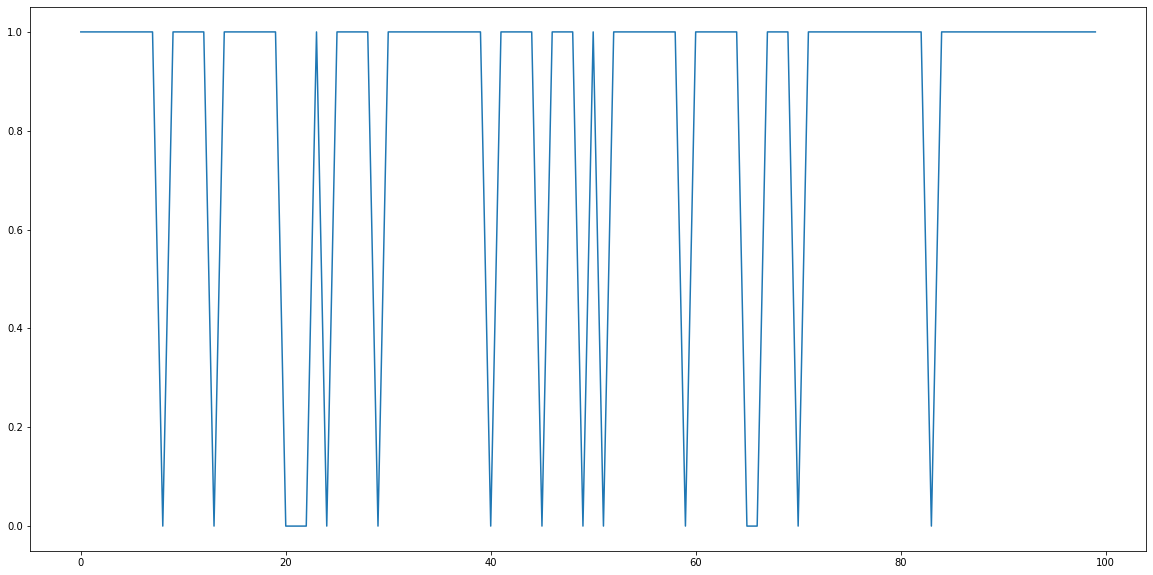

In [ ]:
x = np.random.rand(100)
a = 0.5
delta = 0.1

plt.figure(figsize=(20,10))
plt.plot(steperr(x,a,delta))
plt.show()

## Question 10
Define a function MSE(x; a) with x being a vector and a a scaler to calculate the mean squared difference between the entries of x and a

In [ ]:
def MSE(x, a):
    return np.mean((x-a)**2)

x = np.random.rand(1000)
print(MSE(x,0.5))

0.08281460027464027


## Question 11
Generate 10000 realizations of t = sampmean(N) for values of N going from 1 to 100, calculate
the corresponding mean squared error for each value of N using the MSE function, and plot MSE
as a function of N in both linear as well as logarithmic scale. Comment on this behavior.

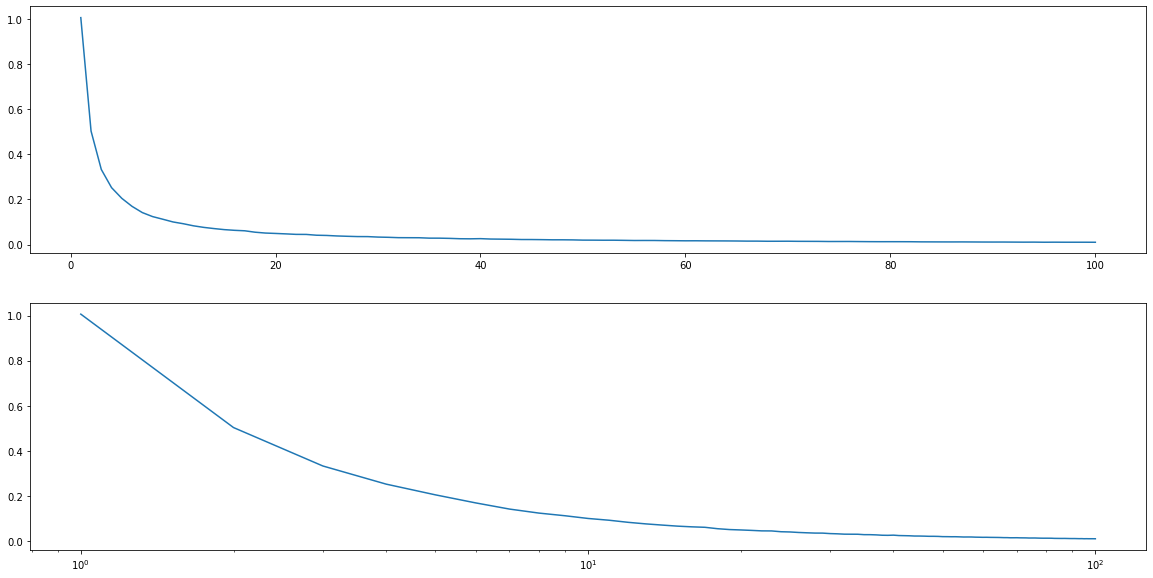

In [ ]:
y = []
N = np.arange(1,101,1)

for n in N:
  x = [] 
  for _ in range(10000):
    x.append(sampmean(n))
  y.append(MSE(np.array(x),0))

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(N,y)
plt.subplot(212)
plt.semilogx(N,y)
plt.show()


## Question 12
Find a way to calculate the probability of error using steperr() for a given value of delta. With
an error event being defined as the case when the sample mean of a zero mean Gaussian random
variable exceeds the value delta. Use your method to calculate the probability of error in sampmean()
as a function of N for $ \delta $ = 0.1 ; 0.01 ; 0.001.




In [ ]:
n = 100
deltas = [0.1,0.01,0.001]

x= [sampmean(n) for i in range(10000)]

for delta in deltas:
  y = steperr(x,np.array(0),delta)
  prob = np.sum(y)/len(y)
  print(f"For delta = {delta}, the probability of error is {prob:.2f}")


For delta = 0.1, the probability of error is 0.32
For delta = 0.01, the probability of error is 0.92
For delta = 0.001, the probability of error is 0.99


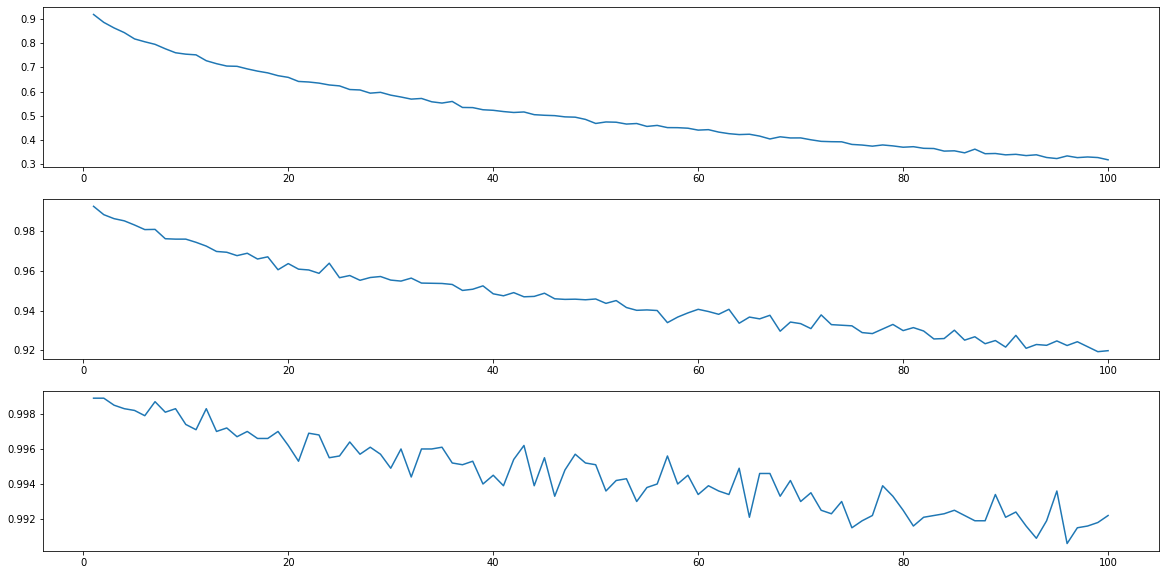

In [ ]:
Ns = np.arange(1,101,1)

prob1=[]
prob2=[]
prob3=[]

for n in Ns:
  x = [sampmean(n) for i in range(10000)]
  y = steperr(x,np.array(0),0.1)
  prob1.append(np.sum(y)/len(y))

for n in Ns:
  x = [sampmean(n) for i in range(10000)]
  y = steperr(x,np.array(0),0.01)
  prob2.append(np.sum(y)/len(y))

for n in Ns:
  x = [sampmean(n) for i in range(10000)]
  y = steperr(x,np.array(0),0.001)
  prob3.append(np.sum(y)/len(y))   

plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(N,prob1)
plt.subplot(312)
plt.plot(N,prob2)
plt.subplot(313)
plt.plot(N,prob3)
plt.show()   
  